In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('C:\\Users\\ESHOP\\Documents\\Kaggle Practice Project\\Datasets\\Uncleaned_employees_final_dataset (1).csv\\Uncleaned_employees_final_dataset (1).csv')

# Show the first few rows of the dataset
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [2]:
df.isnull().sum()


employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [3]:
df.describe()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


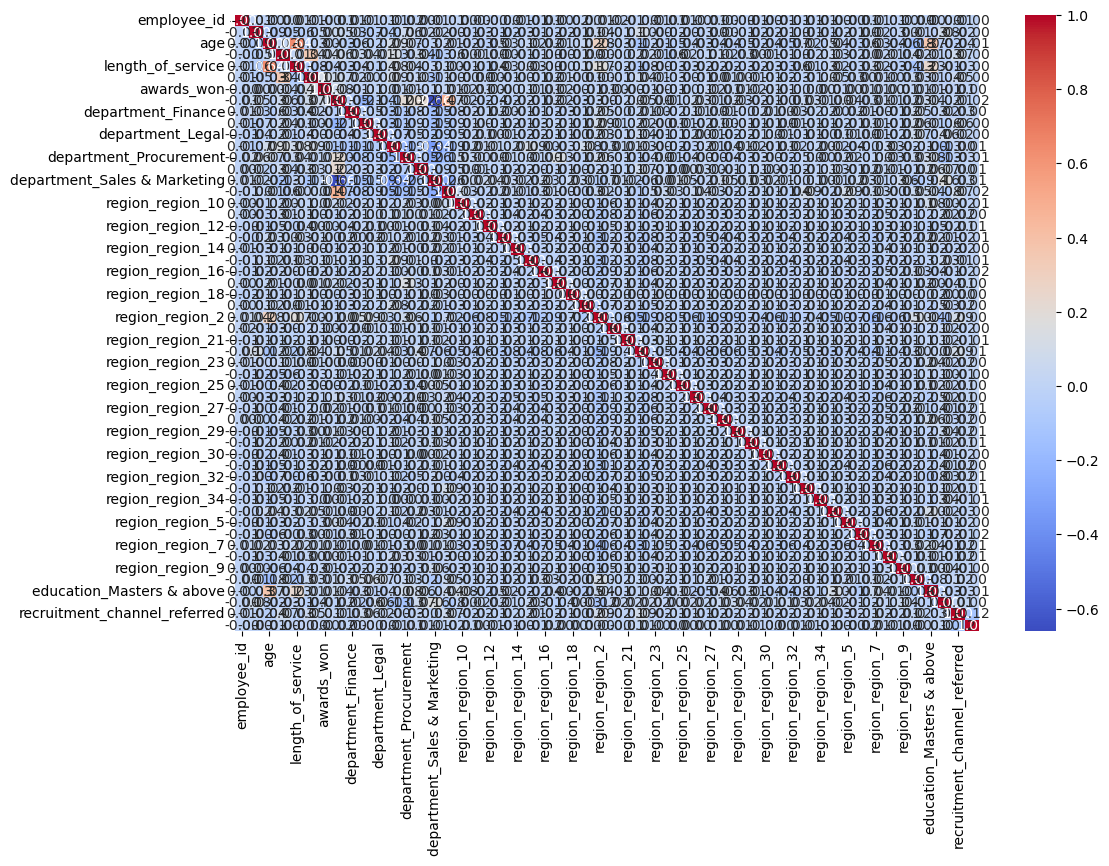

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode categorical variables (if you want them in the correlation matrix)
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate correlation with the encoded data
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



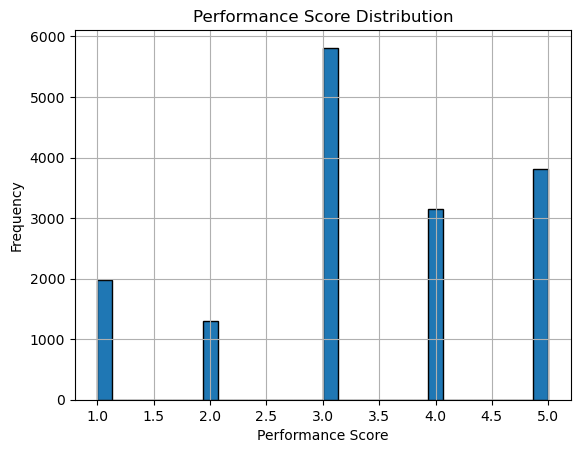

In [8]:
df['previous_year_rating'].hist(bins=30, edgecolor='black')
plt.title('Performance Score Distribution')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.show()


In [9]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('awards_won', axis=1)  # Features
y = df['awards_won']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Create a HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)


HistGradientBoostingRegressor()

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 0.024649253731343284
R-squared (Random Forest): -0.04761537815126071


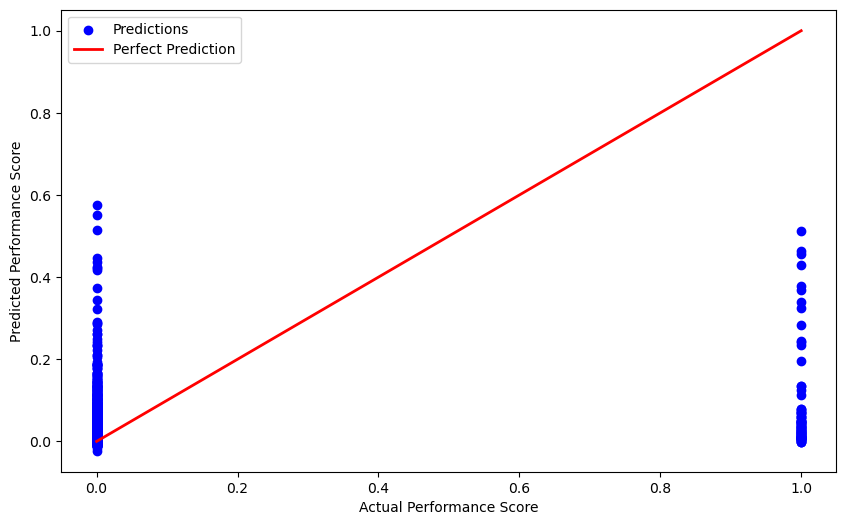

In [16]:
# After fitting the model, generate predictions for the test set
y_pred = model.predict(X_test)

# Now you can plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Performance Score')
plt.ylabel('Predicted Performance Score')
plt.legend()
plt.show()
